In [ ]:
import pandas as pd

## Ridership

In [ ]:
# Raw Dataset can be found in https://nusu-my.sharepoint.com/:f:/g/personal/e0938628_u_nus_edu/EtS-kpicPdFHryNhP7c7bZ8BQrrXI4CwCJctN0jeEr8lHw
df_ridership = pd.read_csv('yearly_ave_daily_public_transport_ridership.csv')
df_ridership['date'] = df_ridership['year'].map(lambda x: str(x)+'-12-31')
df_ridership['date'] = pd.to_datetime(df_ridership['date'])
df_ridership.drop('year', axis=1, inplace=True)
df_ridership.head()

,mode,ridership,date
0,MRT,740000,1995-12-31
1,LRT,0,1995-12-31
2,Bus,3009000,1995-12-31
3,MRT,850000,1996-12-31
4,LRT,0,1996-12-31


In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
df_pivoted = df_ridership.pivot(index='date', columns=['mode'], values='ridership')
df_pivoted= df_pivoted.resample('SMS').mean().bfill() #SMS - 1 & 15 of month
df_pivoted.to_csv('ridership_new.csv')
df_pivoted.head()

mode,Bus,LRT,MRT
date,,,
1995-12-15,3009000.0,0.0,740000.0
1996-01-01,3118000.0,0.0,850000.0
1996-01-15,3118000.0,0.0,850000.0
1996-02-01,3118000.0,0.0,850000.0
1996-02-15,3118000.0,0.0,850000.0


## COE

In [ ]:
month_mapping = {
    "January": "01",
    "February": "02",
    "March": "03",
    "April": "04",
    "May": "05",
    "June": "06",
    "July": "07",
    "August": "08",
    "September": "09",
    "October": "10",
    "November": "11",
    "December": "12"
}

first_second_mapping = {
    "First": "01",
    "Second": "15"
}

In [ ]:
def generate_date(bidding_exercise):
    splitted = bidding_exercise.split(' ')
    new_date = splitted[1] +  '-' + month_mapping[splitted[0]] + '-' + first_second_mapping[splitted[2]]
    return new_date
    

In [ ]:
def shorten_category(cat):
    splitted = cat.split(' ')
    return splitted[1]

In [ ]:
def remove_number_format(num):
    return num.replace('$', '').replace(',', '')

In [ ]:
df_coe = pd.read_csv('Results of COE Bidding Exercise - Results.csv')
df_coe['Date'] = df_coe['Bidding Exercise'].map(generate_date)
df_coe['Date'] = pd.to_datetime(df_coe['Date'])
df_coe.drop(['Bidding Exercise', 'Announcement Date', 'Year'], axis=1, inplace=True)
df_coe['Category'] = df_coe['Category'].map(shorten_category)
df_coe['Quota Premium'] = df_coe['Quota Premium'].map(remove_number_format).astype(int)
df_coe['Quota'] = df_coe['Quota'].map(remove_number_format).astype(int)
df_coe['Total Bids Received'] = df_coe['Total Bids Received'].map(remove_number_format).astype(int)
df_coe['Number of Successful Bids'] = df_coe['Number of Successful Bids'].map(remove_number_format).astype(int)
df_coe.head()

,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Date
0,A,554,80000,689,541,2022-08-01
1,B,474,107001,612,474,2022-08-01
2,C,95,56089,168,93,2022-08-01
3,D,573,11000,696,562,2022-08-01
4,E,167,113000,293,165,2022-08-01


In [ ]:
df_pivoted_coe = df_coe.pivot(index='Date', columns=['Category'], values=['Quota', 'Quota Premium', 'Total Bids Received', 'Number of Successful Bids'])
df_pivoted_coe.columns = [' '.join(col) for col in df_pivoted_coe.columns]
df_pivoted_coe.to_csv('coe_new.csv')
df_pivoted_coe.head()

,Quota A,Quota B,Quota C,Quota D,Quota E,Quota Premium A,Quota Premium B,Quota Premium C,Quota Premium D,Quota Premium E,Total Bids Received A,Total Bids Received B,Total Bids Received C,Total Bids Received D,Total Bids Received E,Number of Successful Bids A,Number of Successful Bids B,Number of Successful Bids C,Number of Successful Bids D,Number of Successful Bids E
Date,,,,,,,,,,,,,,,,,,,,
2002-04-01,1110,558,506,839,682,37201,39509,23001,540,41001,2484,1119,795,1319,1797,1092,551,506,835,631
2002-04-15,1149,553,506,838,754,36000,42101,24001,409,42043,1890,1104,813,1084,1407,1148,553,490,837,753
2002-05-01,1128,560,506,836,960,35000,40001,24801,402,40001,1705,1043,900,976,1880,1127,518,472,793,930
2002-05-15,1111,552,522,833,910,33401,38001,24002,283,38399,1320,894,815,1044,1835,1080,541,508,831,877
2002-06-01,1111,595,540,875,939,33009,33001,22804,109,34397,1382,885,800,1010,1777,1105,569,540,866,938


## Average Median Household Income

In [ ]:
df_household_income = pd.read_csv('Average-Median-Household-Income.csv')
df_household_income['date'] = df_household_income['Year'].map(lambda x: str(x)+'-12-31')
df_household_income['date'] = pd.to_datetime(df_household_income['date'])
df_household_income.drop('Year', axis=1, inplace=True)
df_household_income.set_index('date', inplace=True)
df_household_income.head()

,Resident Households Average,Resident Households Median1/,Resident Employed Households Average,Resident Employed Households Median1/
date,,,,
2000-12-31,5436,4000,5947,4398
2001-12-31,5972,4363,6417,4716
2002-12-31,5667,4096,6229,4590
2003-12-31,5670,4071,6276,4612
2004-12-31,5666,4066,6285,4552


In [ ]:
df_household_income= df_household_income.resample('SMS').mean().bfill() #SMS - 1 & 15 of month
df_household_income.to_csv('average_median_household_income_new.csv')
df_household_income.head()

,Resident Households Average,Resident Households Median1/,Resident Employed Households Average,Resident Employed Households Median1/
date,,,,
2000-12-15,5436.0,4000.0,5947.0,4398.0
2001-01-01,5972.0,4363.0,6417.0,4716.0
2001-01-15,5972.0,4363.0,6417.0,4716.0
2001-02-01,5972.0,4363.0,6417.0,4716.0
2001-02-15,5972.0,4363.0,6417.0,4716.0


## Personal Disposable Income

In [ ]:
df_disposable_income = pd.read_csv('Personal-Disposable-Income.csv')
df_disposable_income = df_disposable_income.set_index('Data Series').T
df_disposable_income.reset_index(inplace=True)
df_disposable_income.head()


Data Series,index,Personal Disposable Income (Million Dollars),Personal Saving (Million Dollars),Personal Saving Rate (Per Cent)
0,2022 1Q,71847.8,26950.9,37.5
1,2021 4Q,69320.7,26577.2,38.3
2,2021 3Q,62810.5,22009.0,35.0
3,2021 2Q,62108.4,21939.7,35.3
4,2021 1Q,67147.5,25678.6,38.2


In [ ]:
import calendar
import datetime

quarter_mapping = {
    "1Q": 3,
    "2Q": 6,
    "3Q": 9,
    "4Q": 12
}

def convert_quarter(quarter):
    splitted = quarter.split(' ')
    year = int(splitted[0])
    month = quarter_mapping[splitted[1]]
    last_day_of_month = datetime.date(year, month, calendar.monthrange(year, month)[1])
    return last_day_of_month


In [ ]:
df_disposable_income['date'] = df_disposable_income['index'].map(convert_quarter)
df_disposable_income['date'] = pd.to_datetime(df_disposable_income['date'])
df_disposable_income.drop('index', axis=1, inplace=True)
df_disposable_income.set_index('date', inplace=True)
df_disposable_income.head()


Data Series,Personal Disposable Income (Million Dollars),Personal Saving (Million Dollars),Personal Saving Rate (Per Cent)
date,,,
2022-03-31,71847.8,26950.9,37.5
2021-12-31,69320.7,26577.2,38.3
2021-09-30,62810.5,22009.0,35.0
2021-06-30,62108.4,21939.7,35.3
2021-03-31,67147.5,25678.6,38.2


In [ ]:
df_disposable_income = df_disposable_income.resample('SMS').mean().bfill()
df_disposable_income.to_csv('personal_disposable_income_new.csv')
df_disposable_income.head()

Data Series,Personal Disposable Income (Million Dollars),Personal Saving (Million Dollars),Personal Saving Rate (Per Cent)
date,,,
1980-03-15,3635.0,639.6,17.6
1980-04-01,3432.6,180.0,5.2
1980-04-15,3432.6,180.0,5.2
1980-05-01,3432.6,180.0,5.2
1980-05-15,3432.6,180.0,5.2


## Weekly Oil Prices

In [ ]:
def volume_to_numeric(vol):
    num_vol = float(vol[:-1])
    unit = vol[-1]
    if unit == 'K':
        num_vol *= 1000
    elif unit == 'M':
        num_vol *= 1000000
    return int(num_vol)

def remove_percent_sign(num):
    return num.replace('%', '')
    

In [ ]:
df_oil_price = pd.read_csv('Crude Oil WTI Futures Historical Data Weekly.csv')
df_oil_price['date'] = pd.to_datetime(df_oil_price['Date'])
df_oil_price.drop(['Date'], axis=1, inplace=True)
df_oil_price.set_index('date', inplace=True)
df_oil_price.sort_values('date', inplace=True)
df_oil_price['Vol.'] = df_oil_price['Vol.'].map(volume_to_numeric)
df_oil_price['Change %'] = df_oil_price['Change %'].map(remove_percent_sign)
df_oil_price = df_oil_price.resample('SMS').first()
df_oil_price.rename(columns={"Price": "Oil Price"}, inplace=True)
df_oil_price.to_csv('oil_price_new.csv')
df_oil_price.head()

,Oil Price,Open,High,Low,Vol.,Change %
date,,,,,,
2002-01-01,19.68,21.53,22.00,19.60,357620,-8.97
2002-01-15,19.99,18.05,20.17,18.00,287130,11.06
2002-02-01,20.26,20.34,20.36,19.27,342410,-0.59
2002-02-15,21.07,21.22,21.30,20.15,243420,-2.00
2002-03-01,23.84,22.43,24.75,22.13,460980,6.43


## Merge DS
* Some manual modification is made to the header of some of the datasets to standardise the 'date' column for easy merging (mainly is just changing the capitalised 'Date' to 'date')
* The header of the Average-Median-Household-Income-Per-Pax-Clean dataset is also manually modified to add in the 'per pax' to differentiate it from the header of average_median_household_income_new dataset

In [ ]:
import pandas as pd
import glob
# files = [f.replace('./Cleaned Dataset\\', '') for f in glob.glob("./Cleaned Dataset/*.csv")]
# print(files)

In [ ]:
# Cleaned Dataset folder can be found: https://nusu-my.sharepoint.com/:f:/g/personal/e0938628_u_nus_edu/EhSp4BiKNdZPv5q8owIgYiMBVm5peWtHC8vkCdNXFTAELQ
df_merge = pd.read_csv('./Cleaned Dataset/coe_new.csv')
df_merge['date'] = pd.to_datetime(df_merge['date'], format='%d/%m/%Y')
for f in glob.glob("./Cleaned Dataset/*.csv"):
    if 'coe_new' not in f:
        df = pd.read_csv(f)
        if '/' in df['date'].iloc[0]:
            df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
        else:
            df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
        df_merge = df_merge.merge(df, how='left', on='date')
df_merge.set_index('date', inplace=True)
df_merge.to_csv('merge.csv')
df_merge.head()

,Quota A,Quota B,Quota C,Quota D,Quota E,Quota Premium A,Quota Premium B,Quota Premium C,Quota Premium D,Quota Premium E,...,Personal Saving Rate (Per Cent),Rail Length (Kilometres),Mass Rapid Transit (MRT) (Kilometres),Light Rail Transit (LRT) (Kilometres),MRT km Operated (Thousand Train-Kilometres),LRT km Operated (Thousand Car-Kilometres),Average Daily Ridership - MRT (Thousand Passenger-Trips),Average Daily Ridership - LRT (Thousand Passenger-Trips),Average Daily Ridership - Bus (Thousand Passenger-Trips),Average Daily Trip - Point-To-Point (P2P) Transport (Taxis And Private Hire Cars) (Thousand Daily-Trips)
date,,,,,,,,,,,,,,,,,,,,,
2002-04-01,1110,558,506,839,682,37201,39509,23001,540,41001,...,6.6,97.2,89.4,7.8,18025.0,3303.0,1321.0,69.0,2779.0,755.0
2002-04-15,1149,553,506,838,754,36000,42101,24001,409,42043,...,6.6,97.2,89.4,7.8,18025.0,3303.0,1321.0,69.0,2779.0,755.0
2002-05-01,1128,560,506,836,960,35000,40001,24801,402,40001,...,6.6,97.2,89.4,7.8,18025.0,3303.0,1321.0,69.0,2779.0,755.0
2002-05-15,1111,552,522,833,910,33401,38001,24002,283,38399,...,6.6,97.2,89.4,7.8,18025.0,3303.0,1321.0,69.0,2779.0,755.0
2002-06-01,1111,595,540,875,939,33009,33001,22804,109,34397,...,6.6,97.2,89.4,7.8,18025.0,3303.0,1321.0,69.0,2779.0,755.0


In [ ]:
# This is the full merged dataset without dropping null values due to the different frequencies in the different dataset
df_merge = pd.read_csv('merge.csv', index_col = 0)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 2002-04-01 to 2022-08-01
Data columns (total 86 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Quota A                                                                                                   483 non-null    int64  
 1   Quota B                                                                                                   483 non-null    int64  
 2   Quota C                                                                                                   483 non-null    int64  
 3   Quota D                                                                                                   483 non-null    int64  
 4   Quota E                                                              

In [ ]:
df_merge.describe()

,Quota A,Quota B,Quota C,Quota D,Quota E,Quota Premium A,Quota Premium B,Quota Premium C,Quota Premium D,Quota Premium E,...,Personal Saving Rate (Per Cent),Rail Length (Kilometres),Mass Rapid Transit (MRT) (Kilometres),Light Rail Transit (LRT) (Kilometres),MRT km Operated (Thousand Train-Kilometres),LRT km Operated (Thousand Car-Kilometres),Average Daily Ridership - MRT (Thousand Passenger-Trips),Average Daily Ridership - LRT (Thousand Passenger-Trips),Average Daily Ridership - Bus (Thousand Passenger-Trips),Average Daily Trip - Point-To-Point (P2P) Transport (Taxis And Private Hire Cars) (Thousand Daily-Trips)
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,...,474.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,1397.927536,887.592133,355.136646,509.919255,625.913043,37992.380952,43917.395445,29699.055901,3210.556936,44845.033126,...,23.883544,176.806410,149.342308,27.464103,26384.269231,4739.000000,2206.871795,122.000000,3324.192308,736.371795
std,706.748763,343.418906,191.501747,171.624589,374.353197,20535.533186,25409.854253,18559.388287,2895.957994,25701.313080,...,7.399173,39.162863,37.064069,4.545501,8798.045181,1669.509061,708.991310,45.976905,475.345421,62.809615
min,333.000000,302.000000,76.000000,285.000000,145.000000,2.000000,200.000000,1.000000,1.000000,3000.000000,...,6.600000,97.200000,89.400000,7.800000,18025.000000,3303.000000,1321.000000,69.000000,2779.000000,516.000000
25%,687.500000,555.000000,205.500000,393.000000,312.500000,20053.000000,20051.000000,11952.500000,901.000000,21549.500000,...,19.100000,147.700000,118.900000,28.800000,18025.000000,3303.000000,1527.000000,79.000000,2878.000000,755.000000
50%,1431.000000,956.000000,284.000000,480.000000,515.000000,33798.000000,39728.000000,29389.000000,1812.000000,40790.000000,...,24.200000,176.500000,147.700000,28.800000,24442.500000,3751.500000,2100.000000,117.500000,3199.000000,755.000000
75%,1945.500000,1147.000000,507.000000,558.500000,940.500000,53167.000000,62551.000000,46151.500000,5996.500000,64800.000000,...,28.700000,199.600000,170.800000,28.800000,34194.000000,6620.000000,2871.000000,153.000000,3891.000000,755.000000
max,2858.000000,1537.000000,1091.000000,1301.000000,1460.000000,92100.000000,110003.000000,76310.000000,11400.000000,114001.000000,...,38.900000,245.300000,216.500000,28.800000,40883.000000,7566.000000,3384.000000,208.000000,4099.000000,772.000000


In [ ]:
df_merge.shape

(483, 86)

In [ ]:
percent_filled = df_merge.count()/len(df_merge)
col_with_missing_data = percent_filled.where(percent_filled < 1).dropna().index.tolist()
col_with_missing_data
# df_merge_drop = df_merge.drop(col_to_drop, axis=1)
# df_merge_drop.to_csv('merge_drop.csv')

['Resident Households Average Per Pax',
 'Resident Households Median Per Pax',
 'Resident Employed Households Average Per Pax',
 'Resident Employed Households Median Per Pax',
 'Resident Households Average',
 'Resident Households Median1/',
 'Resident Employed Households Average',
 'Resident Employed Households Median1/',
 'MAS Core Inflation Measure (Index)',
 'GDP At Current Market Prices',
 '  Goods Producing Industries',
 '    Manufacturing',
 '    Construction',
 '    Utilities',
 '    Other Goods Industries',
 '  Services Producing Industries',
 '    Wholesale & Retail Trade',
 '    Transportation & Storage',
 '    Accommodation & Food Services',
 '    Information & Communications',
 '    Finance & Insurance',
 '    Real Estate, Professional Services And Administrative & Support Services',
 '    Other Services Industries',
 '  Ownership Of Dwellings',
 '  Gross Value Added At Basic Prices',
 '  Add: Taxes On Products',
 'Household Net Worth',
 '  Assets',
 '    Financial Assets',

In [ ]:
# This dataset is after dropping null values
df_merge_drop = df_merge.dropna()
df_merge_drop.to_csv('coe_master.csv')
df_merge_drop.shape

(468, 86)

## Correlation matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def generate_col_to_drop(category, drop_cat_target=True):
  cat = 'ABCDE'
  cat_to_drop = list(cat.replace(category, ''))
  col = []
  if(drop_cat_target):
    col = ['Quota Premium {}'.format(c) for c in cat]
  else:
    col = ['Quota Premium {}'.format(c) for c in cat_to_drop]
  col_header = ['Quota ', 'Total Bids Received ', 'Number of Successful Bids ']
  for i in cat_to_drop:
    for j in col_header:
      col.append(j + i)
  return col

In [ ]:
df_merge_drop = pd.read_csv('coe_master.csv', index_col = 0)
# Drop columns specific to other categories
df_exclude_other_cat = df_merge_drop.drop(generate_col_to_drop('A', False),axis=1)
df_exclude_other_cat.shape

(468, 70)

In [ ]:
df_exclude_other_cat.describe().T

,count,mean,std,min,25%,50%,75%,max
Quota A,468.0,1424.450855,701.987701,333.0,706.00,1442.0,2025.50,2858.0
Quota Premium A,468.0,36975.893162,20008.386179,2.0,18799.75,33004.5,51506.25,92100.0
Total Bids Received A,468.0,1986.976496,977.418103,418.0,1126.25,2021.5,2610.25,5927.0
Number of Successful Bids A,468.0,1413.764957,700.735576,324.0,703.75,1434.0,1982.50,2858.0
Resident Households Average Per Pax,468.0,2689.987179,673.138213,1713.0,2136.00,2752.0,3289.00,3676.0
...,...,...,...,...,...,...,...,...
LRT km Operated (Thousand Car-Kilometres),468.0,4739.000000,1669.509061,3303.0,3303.00,3751.5,6620.00,7566.0
Average Daily Ridership - MRT (Thousand Passenger-Trips),468.0,2206.871795,708.991310,1321.0,1527.00,2100.0,2871.00,3384.0
Average Daily Ridership - LRT (Thousand Passenger-Trips),468.0,122.000000,45.976905,69.0,79.00,117.5,153.00,208.0
Average Daily Ridership - Bus (Thousand Passenger-Trips),468.0,3324.192308,475.345421,2779.0,2878.00,3199.0,3891.00,4099.0


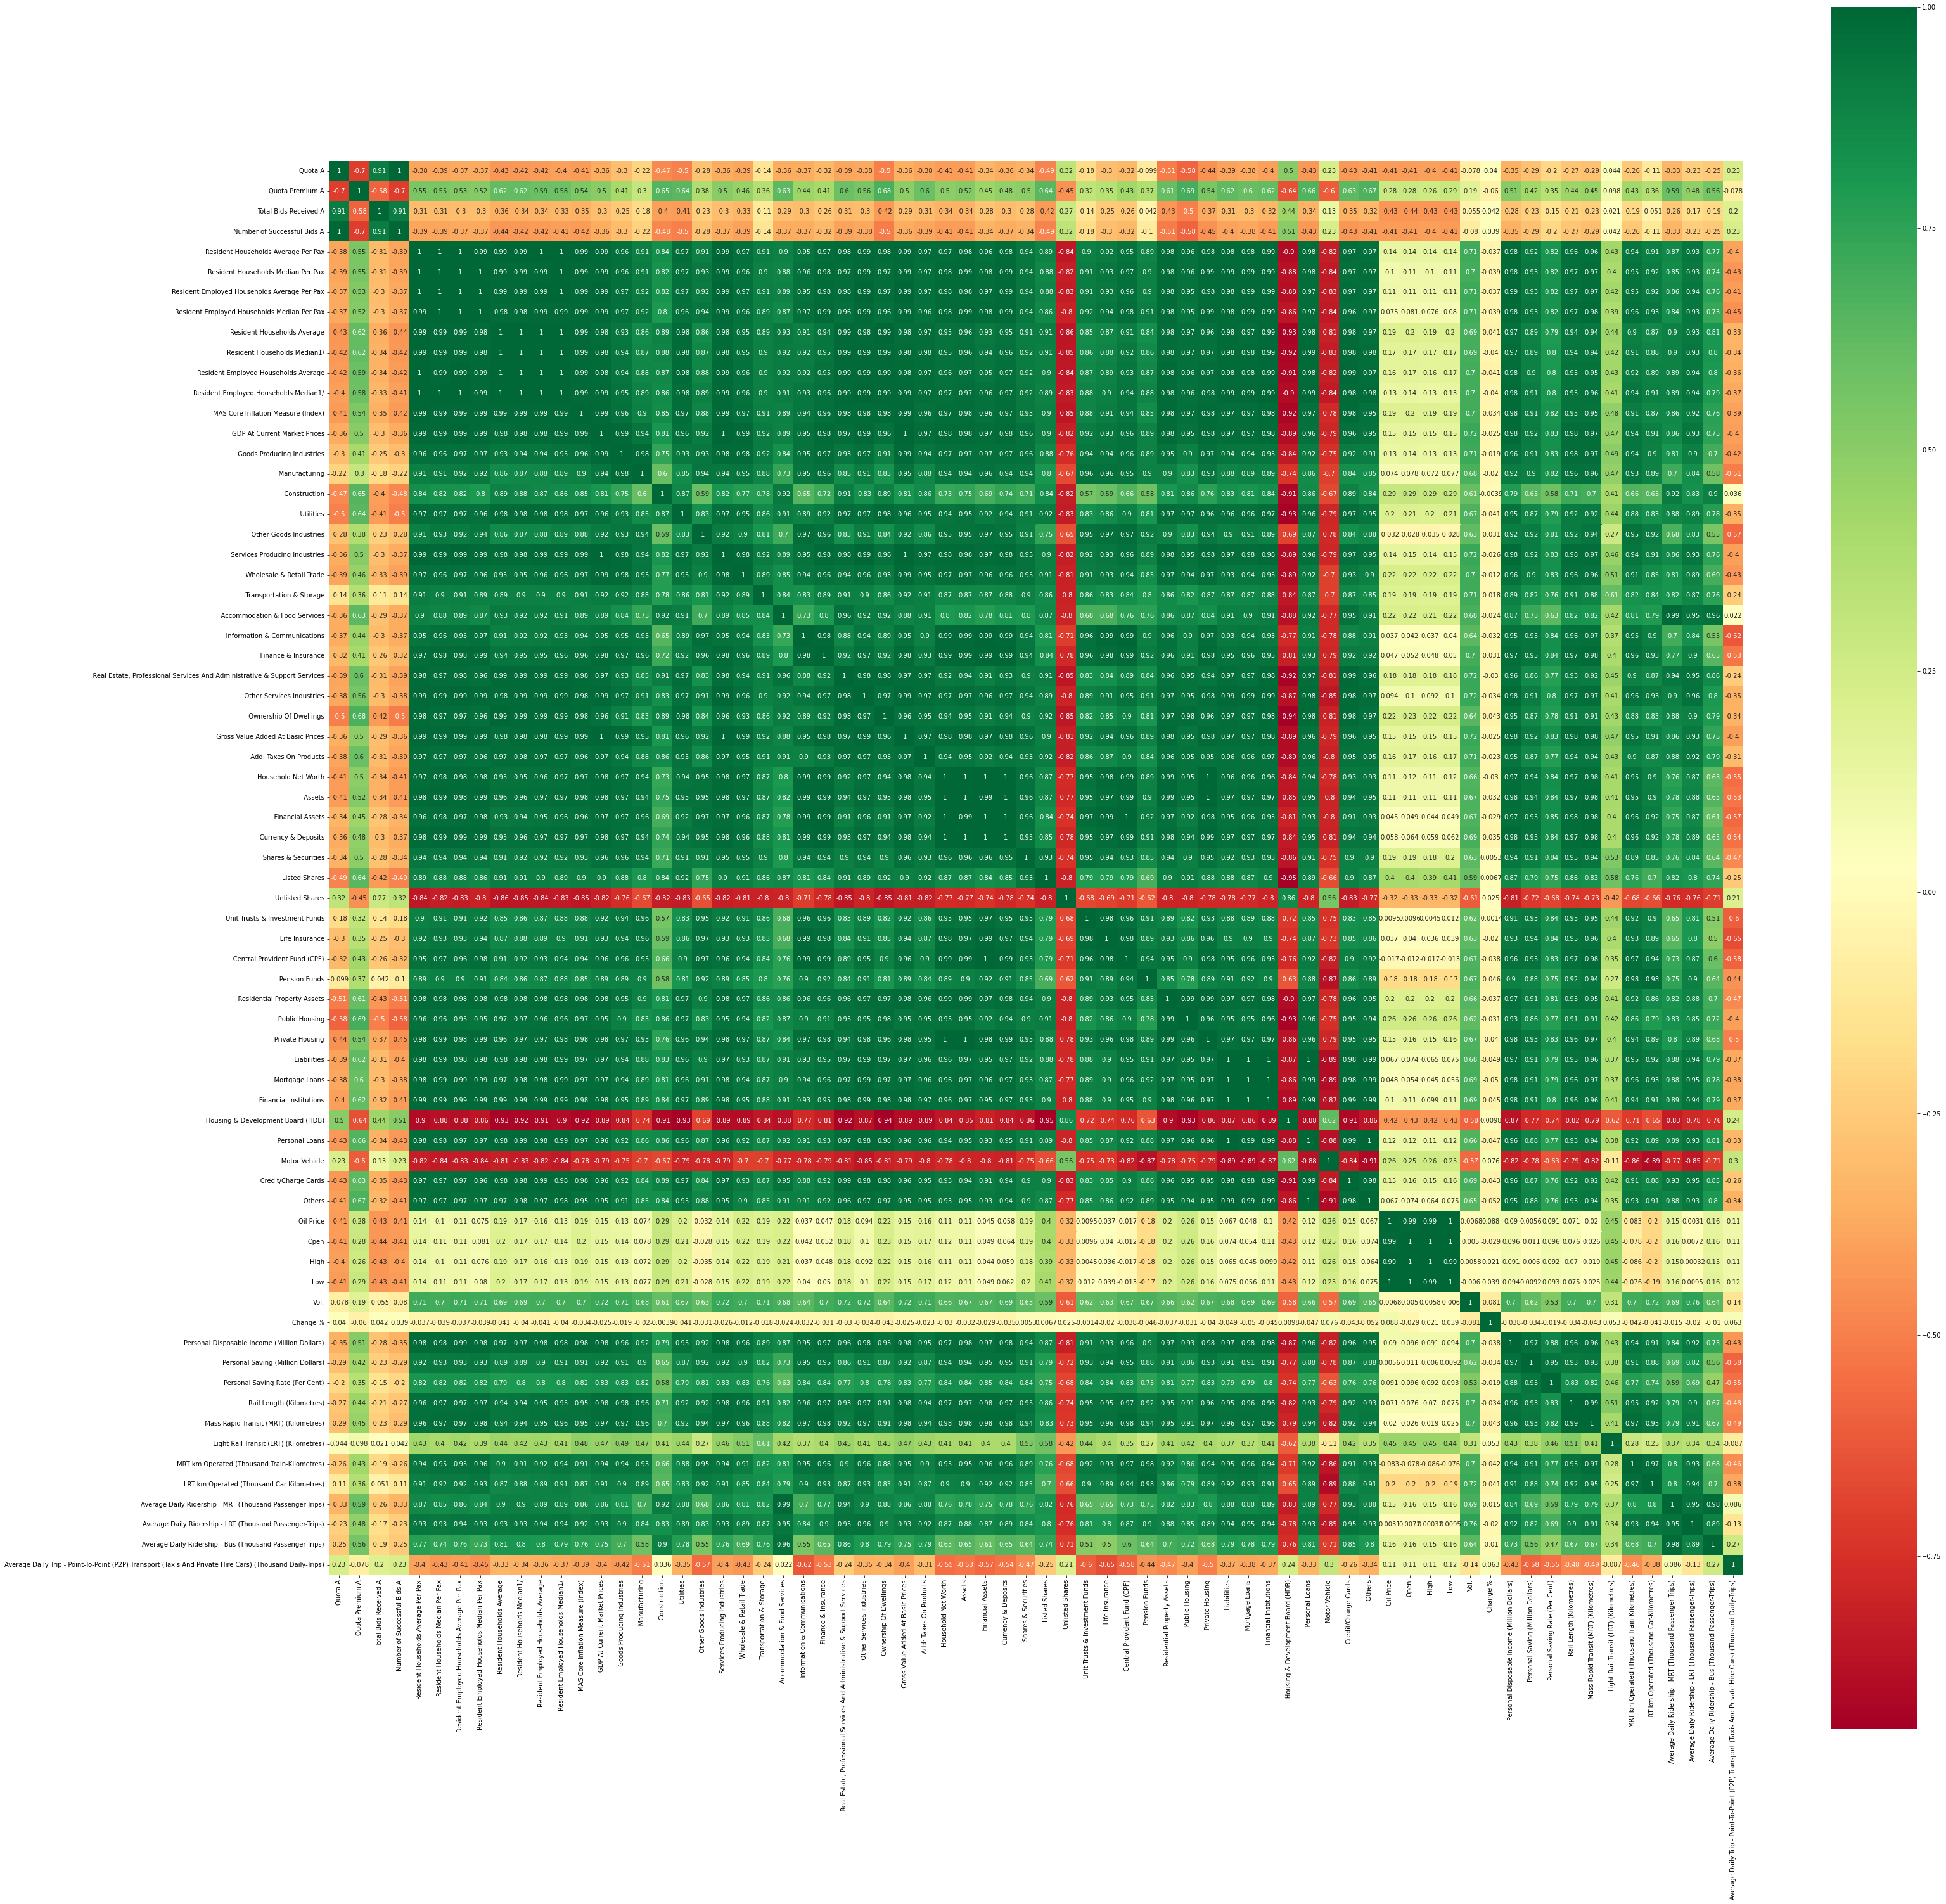

In [ ]:
f = plt.figure(figsize=(50, 50))
ax = plt.subplot(aspect='equal')
corplot = sns.heatmap(df_exclude_other_cat.corr(), cmap='RdYlGn',annot=True,ax=ax)